In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

file_path = r"C:\Users\18014\Desktop\medical_clean.csv"

data = pd.read_csv(file_path)

print(data.head())

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860  

In [2]:
data.columns = data.columns.str.strip()

In [3]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [4]:
print(data.isnull().sum())

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
data = data.drop(['Area', 'Population', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 
                  'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
                  'Item6', 'Item7', 'Item8'], axis=1)

In [6]:
data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,...,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
1,3,51,46805.99,Married,Female,No,18.940352,4,2,1,...,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
2,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,...,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
3,0,78,39741.49,Married,Male,No,16.576858,4,1,0,...,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
4,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,...,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,...,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000
9996,4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,...,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000
9997,3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,...,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000
9998,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,...,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000


In [7]:
#Encoidng columns

#1. Binary Columns encoding
binary_columns = ['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 
                  'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
                  'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Soft_drink']

for col in binary_columns:
    data[col] = data[col].map({'No': 0, 'Yes': 1})

#2. Special binary encoding just for Gender
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1, 'Nonbinary': 2})

#3. One-Hot Encoding for Initial_admin and Services (nominal)
data = pd.get_dummies(data, columns=['Initial_admin', 'Services', 'Marital'], drop_first=True)

#4.Ordinal Encoding for Complication_risk
complication_risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Complication_risk'] = data['Complication_risk'].map(complication_risk_mapping)

#Checking the dataframe
print(data.head())
print(data.dtypes)

   Children  Age    Income  Gender  ReAdmis  VitD_levels  Doc_visits  \
0         1   53  86575.93       0        0    19.141466           6   
1         3   51  46805.99       1        0    18.940352           4   
2         3   53  14370.14       1        0    18.057507           4   
3         0   78  39741.49       0        0    16.576858           4   
4         1   22   1209.56       1        0    17.439069           5   

   Full_meals_eaten  vitD_supp  Soft_drink  ...  Additional_charges  \
0                 0          0           0  ...        17939.403420   
1                 2          1           0  ...        17612.998120   
2                 1          0           0  ...        17505.192460   
3                 1          0           0  ...        12993.437350   
4                 0          2           1  ...         3716.525786   

   Initial_admin_Emergency Admission  Initial_admin_Observation Admission  \
0                               True                           

In [8]:
#Converting boolean (True/False) columns to integers
data = data.astype({col: int for col in data.columns if data[col].dtype == 'bool'})

#data.to_csv("C:/Users/18014/Desktop/data_encoded.csv", index=False)

In [9]:
#Selecting numerical columns
columns_to_include = [
    'Children', 'Age', 'Income', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 
    'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 
    'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
    'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_days', 'TotalCharge', 
    'Additional_charges', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 
    'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Marital_Married', 
    'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed'
]

#Scaling the Data
X = data[columns_to_include]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[-0.50712929, -0.02479466,  1.61591429, ..., -0.49749873,
        -0.49796792, -0.50702172],
       [ 0.417277  , -0.1217056 ,  0.22144303, ..., -0.49749873,
        -0.49796792, -0.50702172],
       [ 0.417277  , -0.02479466, -0.91586974, ..., -0.49749873,
        -0.49796792,  1.97230209],
       ...,
       [ 0.417277  , -0.4124384 ,  0.89156936, ..., -0.49749873,
         2.00816151, -0.50702172],
       [ 0.417277  , -0.50934933, -0.37827063, ..., -0.49749873,
        -0.49796792, -0.50702172],
       [ 2.72829274,  0.79894828,  0.77813279, ..., -0.49749873,
         2.00816151, -0.50702172]])

In [11]:
#data.to_csv("C:/Users/18014/Desktop/data_standard.csv", index=False)

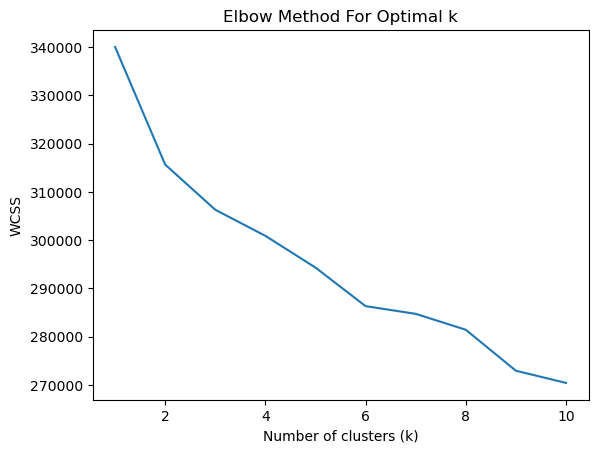

In [12]:
#Creating a List for holding WCSS (Within-cluster sum of squares) values for different k values
wcss = []

#Defining a range of k-values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


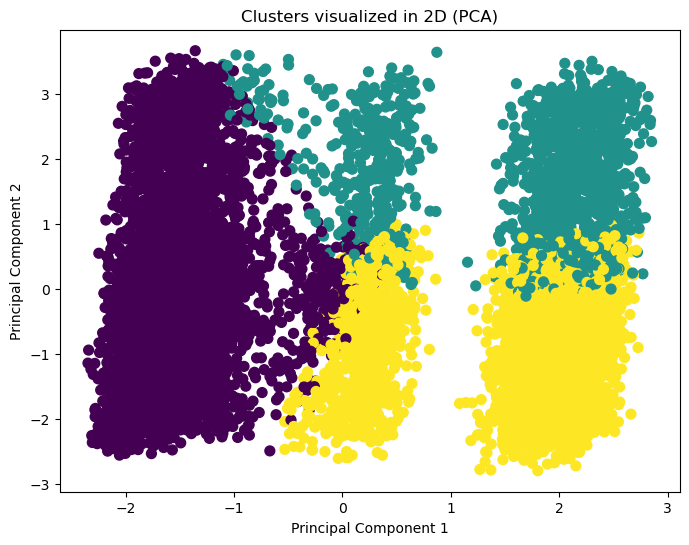

In [34]:
#PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_scaled)

#Adding cluster labels
data['Cluster'] = kmeans.labels_

#Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [14]:
#Inspecting PCA components
pca_components = pca.components_

pca_df = pd.DataFrame(pca_components, columns=X.columns, index=[f'PC{i+1}' for i in range(pca_components.shape[0])])

print(pca_df)


     Children       Age    Income    Gender   ReAdmis  VitD_levels  \
PC1  0.023012  0.030824 -0.013471 -0.003943  0.552248     0.000651   
PC2  0.017021  0.512792 -0.014314  0.009272 -0.034850     0.018029   

     Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  ...  \
PC1   -0.003450         -0.013364   0.014997    0.006011  ...   
PC2    0.013193          0.026942   0.012369    0.000673  ...   

     Additional_charges  Initial_admin_Emergency Admission  \
PC1            0.036686                           0.052094   
PC2            0.698672                           0.053105   

     Initial_admin_Observation Admission  Services_CT Scan  \
PC1                            -0.042926          0.017430   
PC2                            -0.053964          0.023178   

     Services_Intravenous  Services_MRI  Marital_Married  \
PC1             -0.020089      0.009429         0.004243   
PC2             -0.007978      0.009237         0.060198   

     Marital_Never Married  Marital_Se